# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [4]:
len(IMAGE_LIST)

240

In [5]:
IMAGE_LIST[0][0].shape

(372, 640, 3)

---
# 1. Visualize the input images


In [6]:
# Select an image and its label by list index
image_index = 200
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

In [7]:
print('This image is a :', type(selected_image), 
      'n\with dimensions :', selected_image.shape,
      '\nof type :', selected_image.dtype,
      '\nlabelled as : ', selected_label)

This image is a : <class 'numpy.ndarray'> n\with dimensions : (737, 1024, 3) 
of type : uint8 
labelled as :  night


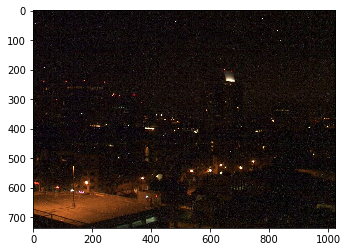

In [8]:
plt.imshow(selected_image)

In [9]:
night_index = 200
night_image = IMAGE_LIST[night_index][0]
night_label = IMAGE_LIST[night_index][1]

In [10]:
day_index = 2
day_image = IMAGE_LIST[day_index][0]
day_label = IMAGE_LIST[day_index][1]

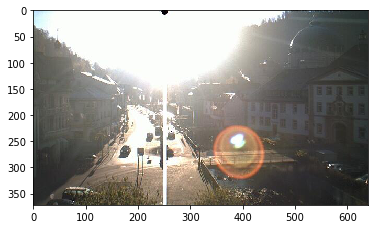

In [11]:
plt.imshow(day_image)

### Plot color channels

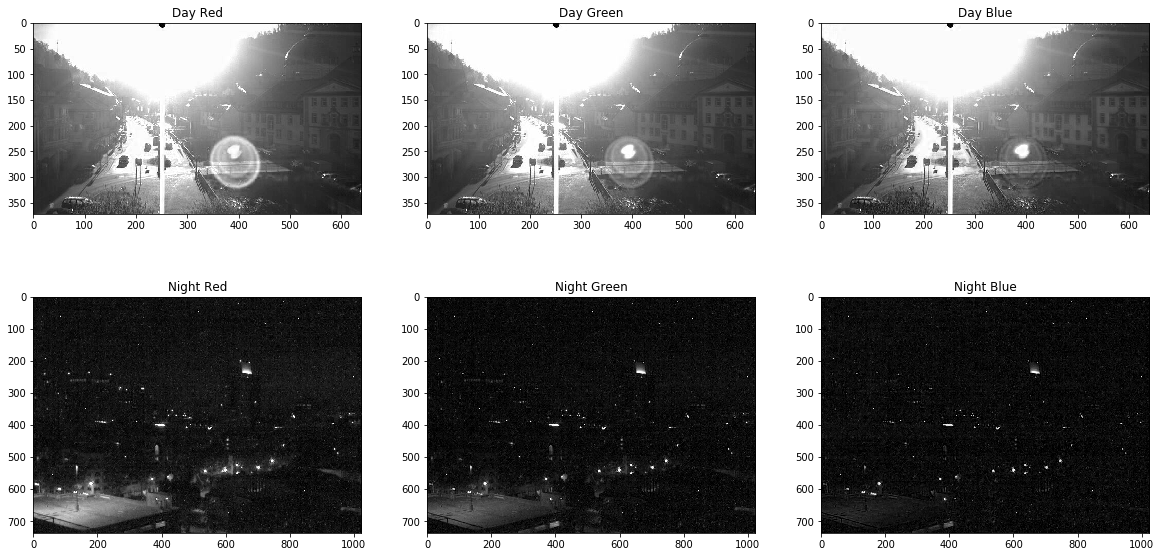

In [16]:
# RGB channels
day_r = day_image[:,:,0]
day_g = day_image[:,:,1]
day_b = day_image[:,:,2]

night_r = night_image[:,:,0]
night_g = night_image[:,:,1]
night_b = night_image[:,:,2]

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))

ax1.set_title('Day Red')
ax1.imshow(day_r, cmap='gray')

ax2.set_title('Day Green')
ax2.imshow(day_g, cmap='gray')

ax3.set_title('Day Blue')
ax3.imshow(day_b, cmap='gray')

ax4.set_title('Night Red')
ax4.imshow(night_r, cmap='gray')

ax5.set_title('Night Green')
ax5.imshow(night_g, cmap='gray')

ax6.set_title('Night Blue')
ax6.imshow(night_b, cmap='gray')

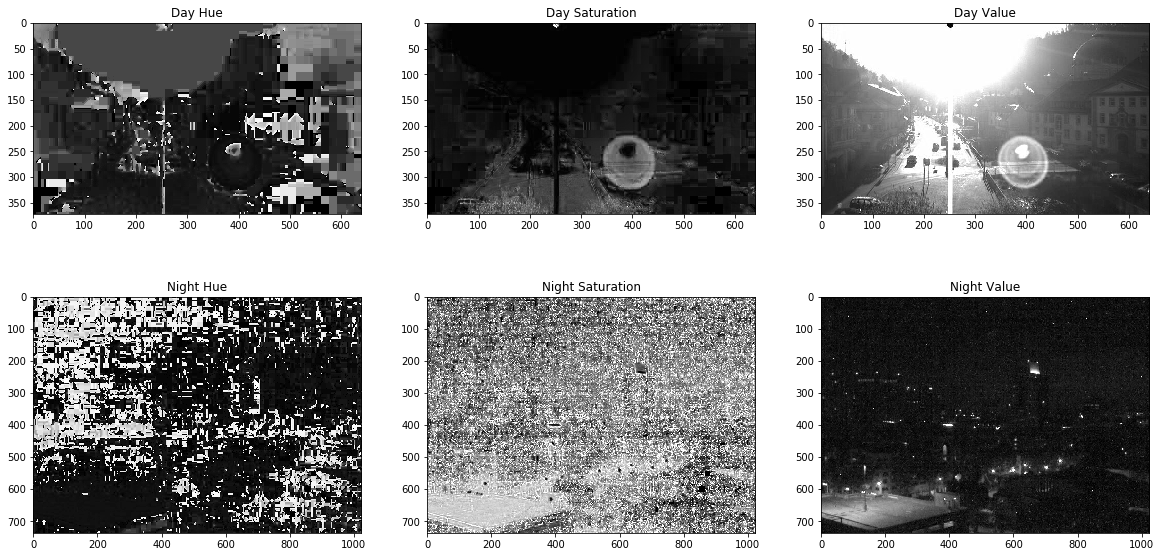

In [17]:
# Convert from RGB to HSV
day_hsv = cv2.cvtColor(day_image, cv2.COLOR_RGB2HSV)
night_hsv = cv2.cvtColor(night_image, cv2.COLOR_RGB2HSV)

# HSV channels
day_h = day_hsv[:,:,0]
day_s = day_hsv[:,:,1]
day_v = day_hsv[:,:,2]

night_h = night_hsv[:,:,0]
night_s = night_hsv[:,:,1]
night_v = night_hsv[:,:,2]

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))

ax1.set_title('Day Hue')
ax1.imshow(day_h, cmap='gray')

ax2.set_title('Day Saturation')
ax2.imshow(day_s, cmap='gray')

ax3.set_title('Day Value')
ax3.imshow(day_v, cmap='gray')

ax4.set_title('Night Hue')
ax4.imshow(night_h, cmap='gray')

ax5.set_title('Night Saturation')
ax5.imshow(night_s, cmap='gray')

ax6.set_title('Night Value')
ax6.imshow(night_v, cmap='gray')